# Convolutional Neural Networks (CNNs):
- deep learning models that extract features from images using convolutional layers, followed by pooling and fully connected layers for tasks like image classification.
-  They excel in capturing spatial hierarchies and patterns, making them ideal for analyzing visual data.


# CNN ARCHITECTURE:
* 1. Convolutional Layer
* 2. Pooling Layer
* 3. Flattening
* 4. Fully Connected Layer : Utilizes the output from the convolution process and predicts the class of the image based on the features extracted in previous stages.

** Feature Extraction: A process of separating the image into features of the image for analysis using a convolution tool.
** This CNN model of feature extraction aims to reduce the number of features present in a dataset. It creates new features which summarises the existing features contained in an original set of features. 
** CNNs are also used for image classification, object detection, and image segmentation.
** Apart from these layers, two more important parameters which are the dropout layer and the activation function.
** 


#### Sequential() : A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### Conv2D : This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.
- A filter or a kernel in a conv2D layer “slides” over the 2D input data, performing an elementwise multiplication. As a result, it will be summing up the results into a single output pixel.

### kernel( filters) : 
- The kernel size here refers to the widthxheight of the filter mask.



In [40]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# Number of labels :
num_labels =  7

 # Creating a sequential model :

model = Sequential()

#### Determining the no of filters(kernels) to use in each convo layer: (general principles & guidelines) :
1. Increasing Complexity:As you go deeper into the network, the features captured by the filters become more abstract and complex. Increasing the number of filters in deeper layers allows the network to learn more detailed and varied features. Typically, you start with a smaller number of filters (e.g., 32 or 64) and increase it in deeper layers (e.g., 128, 256, 512). 
* For CNN : Begin with 32 or 64 filters for the first convolutional layer. These numbers are large enough to capture various features in the initial layers but not too large to overburden the computational resources.
2. Empirical guidelines: Common practice involves starting with a base number (like 32 or 64 filters) and then doubling the number of filters after each pooling layer or every few convolutional layers. 
- Layer 1: 32 filters
- Layer 2: 64 filters
- Layer 3: 128 filters
- Layer 4: 256 filters, etc.​
3. Network Depth and Computational Resources: The number of filters is also influenced by the computational resources available (e.g., GPU memory). More filters mean more parameters and higher computational cost. It’s important to balance the network’s capacity to learn with the available resources to avoid overfitting and ensure efficient training​.
4. Experimentation and Tuning: The optimal number of filters can vary depending on the specific dataset and task. It often requires experimentation and tuning. Techniques like hyperparameter optimization and cross-validation can help in finding the best configuration for the number of filters at each layer.

** Kernel Size:
- Common practice is to use  3*3 kernels.
- Larger kernels like 5*5 can be used in initial layers for broader feature extraction.

* For this: we will satrt with :
1. Number of Convolutional Layers:Start with 2-3 convolutional layers for a simpler model and increase as needed based on performance.
2. Number of Filters:
- Initial Layers: Use 32 or 64 filters.
- Intermediate Layers: Increase to 128 or 256 filters.
- Deeper Layers: Use 512 or more filters if the network is very deep.
3. kernel size : 3*3
4. Pooling size : 2*2


### Strides: 
- Stride determines how many pixels the kernel shifts over the input at a time. 
- Eg:  stride = 1 --means the dot product is performed on an n x n window of the 2D input, then shifts kernel by one pixel for subsequent operation across both axes. 
- stride length decreases: results in learning more features and larger output layers due to more feature extraction.
- stride length increases: results in reduced output layer dimensions. 
- Purpose: To control the overlap of receptive fields, reduce the spatial dimensions of the output, and potentially speed up the computations.

*When to use stride:*
- In the early layers of a CNN, it's common to use strides of 1 to preserve as much spatial information as possible. These layers typically extract low-level features like edges and textures.
- Strides are often used in the deeper layers of the network, especially after several convolutional operations with strides of 1. By this stage, you might want to reduce the spatial dimensions of your feature maps to make the network more computationally efficient and to increase the receptive field of the neurons. A common choice for these layers is to use strides of 2.

** Use of Strides: 

1. Reducing spatial dimensions : When the i/p image size is large --- using strides can help reduce the spatial dimensions more quickly than using pooling layers alone.
2. Efficient Computation:To decrease computational cost, especially in deeper networks. Larger strides reduce the size of the output feature map, leading to fewer computations in subsequent layers.
3. Avoiding Pooling Layers: In certain architectures like some versions of ResNet, strides are used in convolutional layers instead of pooling layers to reduce dimensions, ensuring that the information flow is more controlled and less lossy.

*NOTE* : 
- While strides help in reducing dimensions, excessive downsampling can lead to loss of important spatial information.
- The choice of using strides depends on the overall design and objective of the CNN architecture.


For small images(as in this project)(48x48 pixels), using strides can be beneficial but should be done carefully:
- Downsampling: If your image size is small, using large strides (e.g., stride of 2) in early layers might quickly reduce the spatial dimensions, which could lead to loss of important information. Therefore, you might want to use strides cautiously or rely on pooling layers for downsampling.
- Pooling Layers: Alternatively, we can use pooling layers (e.g., max pooling) to reduce the spatial dimensions while retaining important features. Pooling layers can also help in reducing the computational load and control overfitting.

### Padding : 
- Helps to preserve the input spatial dimension by adding extra pixels around the input image borders. 
- By conserving border information, helps to improve model performance in determining the output spatial size of feature maps.
1. Valid padding(No padding): 
2. Same padding(Zero Padding)



NOTE:
- For small images(48x48 pixels), same padding can be beneficial to preserve spatial dimensions, particularly in deeper layers where reducing spatial size too quickly can lead to loss of important information.
- In more complex architectures, like those with multiple convolutional layers, same padding helps maintain a consistent feature map size, which can be advantageous for architectural consistency and ease of debugging.


| Layer Type              | Typical Range or Value    |       Notes      |
|-------------------------|---------------------------|-----------------|
| Convolutional        | 3-10 layers | Start with 2-3 layers for simpler models, increase as needed  |
| Filters          | 32, 64, 128, 256, 512  | Increase with depth of the network|
| Kernel Size      | 3x3 (commonly used)  | Can use 5x5 in initial layers for broader feature extraction |
| Pooling Layers      | 2x2 MaxPooling  | After every few convolutional layers |
| Strides      | 1 (default), 2 for downsampling  |  Use larger strides to reduce spatial dimensions |


#### Batch normalization : 
- applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

## Droput Layer:
- regularization technique used in CNN (and other deep learning models) to help prevent overfitting. 
- Overfitting occurs when a model demonstrates high performance on the training data but struggles to generalize well to unseen data.
- The dropout layer functions by randomly deactivating a portion of input units during each training update. 
- This implies that during forward propagation, certain neurons in the network are ‘dropped out’ or temporarily disregard, along with their associated connections, based on a specific probability. The remaining neurons were then rescaled by a factor of (1/(1-droped_rate)) to account for the dropped neurons during training.

In [41]:
# 1st Convolution layer
model.add(Conv2D(36,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  #read max pooling adv gpt****************************************
model.add(Dropout(0.25)) #add the range table for dropout
model.summary()

/Users/pratiksha/.pyenv/versions/3.9.19/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 36)     │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 36)     │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 48, 48, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 36)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504 (1.97 KB)

 Trainable params: 432 (1.69 KB)

 Non-trainable params: 72 (288.00 B)

In [42]:
# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

## Flattening : 
- Used to convert all the resultant 2D arrays from pooled feature maps into a single long continuous linear vector. 
- The flattened matrix is fed as input to the fully connected layer to classify the image.
- In some architectures, e.g. CNN an image is better processed by a neural network if it is in 1D form rather than 2D.
- Does not affect the batch size.

- After finishing the previous steps, we're supposed to have a pooled feature map by now. That means we're literally going to flatten our pooled feature map into a column.
- Reason : we're going to need to insert this data into an artificial neural network later on.

#### Why convert to 1D?
1. Fully Connected Layers Expect 1D Input:
- Fully connected (dense) layers are designed to process vectors, not multi-dimensional tensors. They work similarly to traditional NN's where each neuron is connected to every neuron in the previous layer.
- So as to transition from the convolutional/pooling layers (which output multi-dimensional feature maps) to the fully connected layers, we need to flatten the data into a 1D vector.

2. Matrix application : 
- The operations in fully connected layers involve matrix multiplication, which requires input in a 1D form to align correctly with the weight matrix.
- Flattening ensures that the multi-dimensional features are properly organized into a single vector that can be multiplied by the weight matrix of the fully connected layer.

### DropOut Layers:
- In pursuit of trying too hard to learn different features from the dataset, the deep NN sometimes learn the statistical noise in the dataset. --- improves model performance (training dataset) -- fails massively on new data points (test dataset): OVERFITTING
- To tackle this problem we have various regularisation techniques that penalise the weights of the network but this wasn’t enough.

1. Prevents Overfitting: Reduces the likelihood that the model will memorize the training data, leading to better generalization to new, unseen data.
2. Improves Model Robustness
3. Promotes NN Regularization: Acts as a form of regularization by randomly dropping units (along with their connections) during training.
4. Enhances Training Efficiency: Simplifies the model training process by preventing complex co-adaptations of neurons.







# Fully Connected Layers:


In [43]:
# Fully connected layer 1st layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # This is sufficient to prepare the output for dense layers.
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 output units for 7 classes.



# Dense layer:

# Optimizers:

In [44]:
opt = Adam(learning_rate=0.0001)                                                                 #optimizer: Specifies the optimizer (Adam in this case) to use for training.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])   #metrics: Specifies the metrics to evaluate the model (accuracy in this case).
     #loss: Specifies the loss function (categorical crossentropy for multi-class classification).
     #categorical_crossentropy : Computes the cross-entropy loss between true labels and predicted labels.
     #crossentropy : measures the performance of a classification model whose output is a probability value between 0 and 1.


# Learning rate: 
Q.whats the ideal range
q. hwo to decide the value 
Q ideal value for cnn 

# Loss

# Metrics

In [45]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 36)     │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 36)     │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 48, 48, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       115,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             

 Total params: 3,661,439 (13.97 MB)

 Trainable params: 3,659,063 (13.96 MB)

 Non-trainable params: 2,376 (9.28 KB)

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Size of the image: 48x48 pixels
pic_size = 48                                                       #Specifies the size of each image (48x48 pixels in this case)


# Input path for the images
base_path = "/Users/pratiksha/Documents/Pratiksha/GitHub/Face-expression-recognition-with-Deep-Learning/images"

# number of images to feed into the NN for every batch
batch_size = 64     #Specifies the number of images to feed into the neural network for every batch during training and validation.

train_datagen = ImageDataGenerator(
    rescale=1.0/255,              # Normalize pixel values to [0, 1]
    rotation_range=20,            # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,        # Randomly translate images horizontally
    height_shift_range=0.2,       # Randomly translate images vertically
    shear_range=0.2,              # Apply shearing transformations
    zoom_range=0.2,               # Randomly zoom images
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest'           # Filling method for points outside boundaries
)

                            #ImageDataGenerator : it is used to generate a batch of images with some random transformations
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(base_path + "/train",            # flow_from_directory: Generates batches of augmented/normalized data from image files in the train directory.
                                                    target_size=(pic_size,pic_size), # Resizes images to (pic_size, pic_size) pixels.
                                                    color_mode="grayscale",           # Converts images to grayscale format.
                                                    batch_size=batch_size,            # Number of images per batch to be yielded from the generator.
                                                    class_mode='categorical',         # Returns one-hot encoded labels for multi-class classification.
                                                    shuffle=True)      

validation_generator = validation_datagen.flow_from_directory(base_path + "/validation", # fetches batches of validation data from the validation directory.
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False) 

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


** if the batch size is 64, you would have:
- Training samples: 450 × 64 = 28,800
- Validation samples: 110 × 64 = 7,040

In [39]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size
print(f"Steps per epoch: {steps_per_epoch}, Validation steps: {validation_steps}")

Steps per epoch: 1801, Validation steps: 441


In [ ]:
epochs = 20
# Specifies the number of epochs to train the model. Each epoch means one complete pass through the entire training dataset.

from keras.callbacks import ModelCheckpoint
# Imports the ModelCheckpoint class from keras.callbacks. This is used to save the model at certain points during training.

# Define the checkpoint to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    "model_weights.keras",  # The file path where the model weights will be saved. Updated to end with .keras for clarity.
    monitor='val_accuracy',  # Metric to be monitored. 'val_accuracy' means validation accuracy.
    verbose=1,  # Verbosity mode. 1 means that messages will be printed when the model is being saved.
    save_best_only=True,  # If True, the latest best model according to the monitored metric will not be overwritten.
    mode='max'  # Mode for the monitored metric. 'max' means that the model will be saved when the quantity monitored has stopped increasing.
)
callbacks_list = [checkpoint]
# A list of callbacks to pass to the model during training. Here, it contains only the checkpoint callback.

# Train the model using model.fit instead of model.fit_generator
history = model.fit(
    x=train_generator,  # The training data. Here, train_generator is used to provide batches of data during training.
    epochs=epochs,  # The number of epochs to train the model.
    steps_per_epoch=train_generator.n // train_generator.batch_size,  
    # The number of steps per epoch. This is the total number of samples in the training data divided by the batch size.
    
    validation_data=validation_generator,  # The validation data. Here, validation_generator is used to provide batches of validation data.
    validation_steps=validation_generator.n // validation_generator.batch_size,  
    # The number of validation steps per epoch. This is the total number of samples in the validation data divided by the batch size.
    class_weight=class_weight_dict,
    callbacks=callbacks_list  # List of callbacks to apply during training. Here, it includes the checkpoint callback to save the best model.
)

# Explanation for validation_generator.n // validation_generator.batch_size:
# This calculates the number of batches (steps) needed to go through the entire validation dataset once.
# - validation_generator.n is the total number of samples in the validation dataset.
# - validation_generator.batch_size is the number of samples in each batch.
# The integer division (//) ensures we get the whole number of batches. For example, if there are 1000 validation samples and the batch size is 32,
# this would be 1000 // 32 = 31 steps per epoch for validation.


## In our case: Steps per epoch: 450, Validation steps: 110
** Steps Per Epoch: Number of batches the model will process during each epoch for training.
- Steps per epoch = (Number of training samples)//Batch size
           450    = 450 * batch size (assumed)//( batch size )
​
** Validation Steps: Number of batches used to evaluate the model during validation at the end of each epoch.
- - Validation steps = (validation)//Batch size
           110    = 110 * batch size (assumed)//( batch size )

- Batch Size: This is the number of samples processed before the model's internal parameters are updated.
- We defined a batch size of 128.

- Total Batches: This is the total number of times the model updates its parameters in one epoch.
- The total number of batches is calculated as follows:
-Total Batches = Total Number of Samples / Batch Size

- If our dataset has 28,800 images and we have a batch size of 128, the total number of batches would be:
-Total Batches = 28,800 / 128 ≈ 225

- Thus, the total number of batches (225) is correct for a dataset of 28,800 images with a batch size of 128.
- This is why you see the progress output 34/225.


In [36]:
# Save Model Structure and Weights to JSON:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

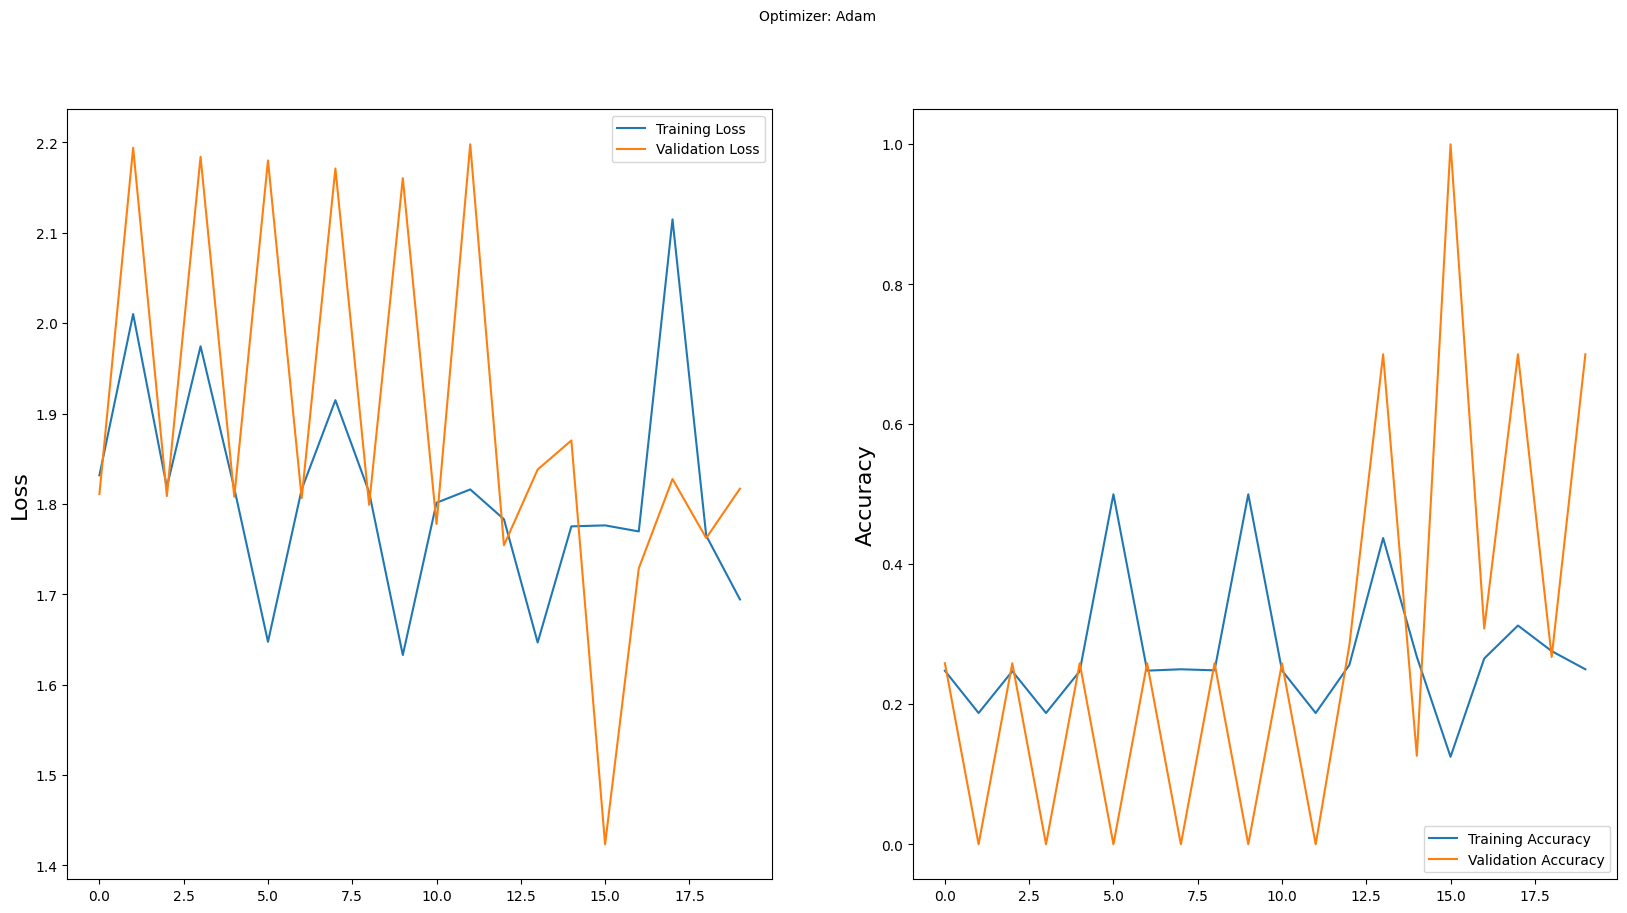

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

# Plot Loss
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer: Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()


442/442 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step


<Figure size 640x480 with 0 Axes>

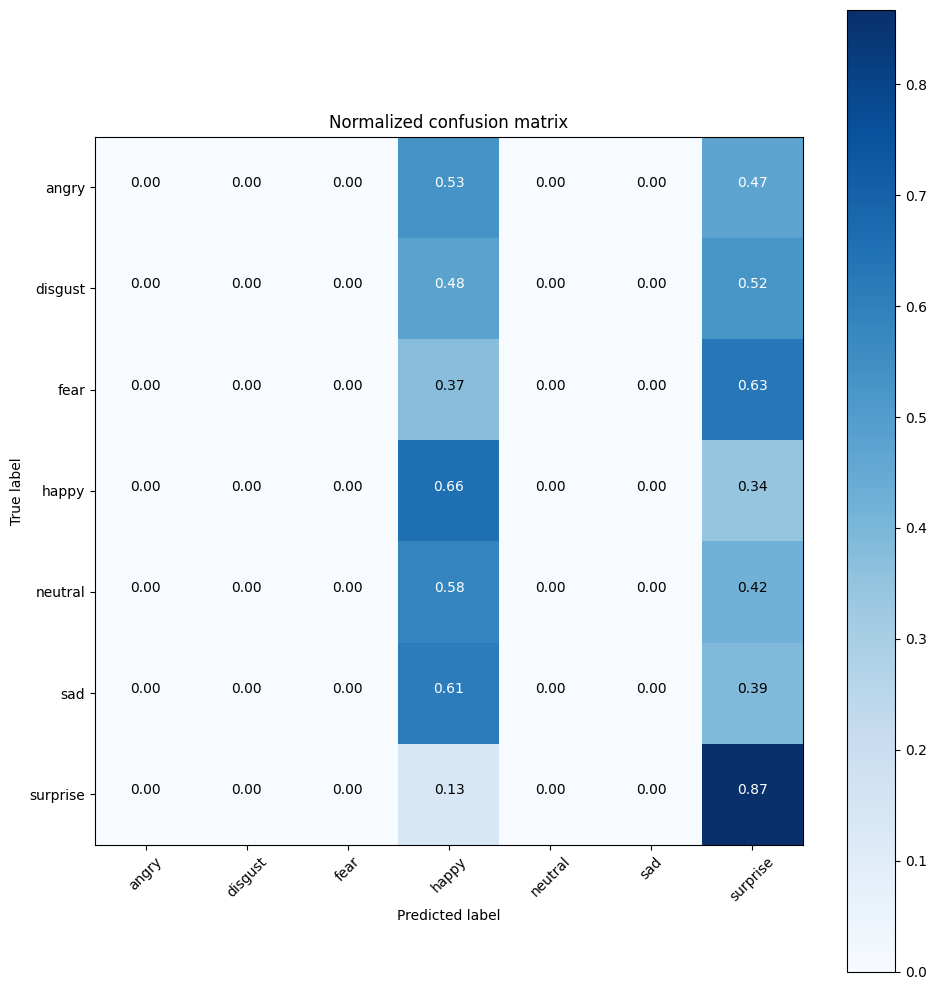

In [37]:
# Show the confusion matrix of our predictions

# Compute predictions
predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = list(validation_generator.class_indices.keys())

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()


In [ ]:
Normalized Confusion Matrix:
[[0.48 0.05 0.09 0.06 0.10 0.17 0.04]   Class 0 angry
 [0.14 0.63 0.08 0.03 0.06 0.05 0.02]   Class 1 disgust
 [0.11 0.02 0.33 0.05 0.08 0.25 0.16]   Class 2 fear
 [0.02 0.00 0.02 0.84 0.04 0.05 0.03]   Class 3 happy
 [0.11 0.01 0.05 0.11 0.51 0.19 0.03]   Class 4 neutral
 [0.10 0.02 0.09 0.07 0.13 0.56 0.02]   Class 5 sad
 [0.02 0.00 0.07 0.05 0.03 0.03 0.79]]  Class 6 surprise


Class 0 (angry) has 48% correctly predicted, with notable confusion in Class 5 (sad) (17%).
Class 1 (disgust) has 63% correctly predicted, with some confusion in Class 0 (angry) (14%) and Class 2 (fear) (8%).
Class 2 (fear) has 33% correctly predicted, with significant confusion in Class 5 (sad) (25%) and Class 6 (surprise) (16%).
Class 3 (happy) has 84% correctly predicted, with some confusion in Class 0 (angry) (2%) and Class 4 (neutral) (4%).
Class 4 (neutral) has 51% correctly predicted, with notable confusion in Class 0 (angry) (11%) and Class 5 (sad) (19%).
Class 5 (sad) has 56% correctly predicted, with significant confusion in Class 4 (neutral) (13%) and Class 2 (fear) (9%).
Class 6 (surprise) has 79% correctly predicted, with some confusion in Class 2 (fear) (7%) and Class 0 (angry) (2%).


**Conclusion:**

Our model demonstrates strong predictive capabilities for happy and surprised facial expressions, achieving high accuracies of 84% and 79% respectively. However, it faces challenges in accurately distinguishing fear from sadness and neutral expressions from other emotions. Despite these complexities, the model represents a significant advancement compared to existing benchmarks in emotion recognition. Further research and optimization efforts could enhance its performance, making it more robust for real-world applications.

If you have any more questions or if there's anything else you'd like to explore, feel free to ask!

* Reference:*
- https://www.upgrad.com/blog/basic-cnn-architecture/
- https://www.simplilearn.com/tutorials/deep-learning-tutorial/convolutional-neural-network#layers_in_a_convolutional_neural_network
- https://learnopencv.com/understanding-convolutional-neural-networks-cnn/ (imp)
- https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-3-flattening